In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Entanglement of a pair of quantum emitters via continuous fluorescence measurements: a tutorial

### SME - ENTANGLEMENT BY JOINT HOMODYNE DETECTION OF FLUORESCENCE, Chap.5

In [2]:
def theo_concurrence(t, gamma):
    return 2*np.exp(-gamma*t)*(1-np.exp(-gamma*t)) 

def concurrence_pure_state(state): 
    ###Compute the concurrence for a pure state
    return 2*np.abs(state[0]*state[3]-state[1]*state[2])

def compute_concurrences(solution):
    ntraj = len(solution.runs_states)
    n_times = len(solution.runs_states[0])  # si assume che tutte le traiettorie abbiano stesso numero di time step

    conc_array = np.zeros((ntraj, n_times))

    for traj_idx in range(ntraj):
        for t_idx, state in enumerate(solution.runs_states[traj_idx]):

            if state.isket:
                conc_array[traj_idx, t_idx] = concurrence_pure_state(state) #Use fast method for pure states
            else:               
                conc_array[traj_idx, t_idx] = concurrence(state)

    return conc_array

def compute_mean_concurrence(conc_array):
    mean_conc = np.mean(np.array(conc_array), axis=0)
    return mean_conc

In [43]:
#  Convenzione: |e> = (1,0) and |g> = (0,1)

# parameters
GAMMA = 1              # Atom decay rate
OMEGA = 1
T_1 = 1 / GAMMA  # time constant for the decay
ntraj = 20 # number of trajectories
I_2 = qeye(2)  # identity operator for 2-level system
sm = sigmam()  # lowering operator for 2-level system (atom)

# operators
sigma_minus_1 = tensor(sm, I_2) # lowering operator for atom 1
sigma_minus_2 = tensor(I_2, sm) # lowering operator for atom 2
sigma_minus_12 = tensor(sigma_minus_1, sigma_minus_2) # combined lowering operator for both atoms    

sigma_plus_1 = sigma_minus_1.dag() # raising operator for atom 1
sigma_plus_2 = sigma_minus_2.dag() # raising operator for atom       
sigma_plus_12 = tensor(sigma_plus_1, sigma_plus_2) # raising operator for both atoms

H_free_atom_1 = 0.5 * OMEGA * tensor(sigmaz(), I_2) # Free Hamiltonian atom 1
H_free_atom_2 = 0.5 * OMEGA * tensor(I_2, sigmaz()) # Free Hamiltonian atom 2
H_free = H_free_atom_1 + H_free_atom_2 # Free Hamiltonian for both atoms        

ee = tensor(basis(2, 0), basis(2, 0))# initial vector state, |e, e> (the atoms must decay from the excited state!)
times = np.arange(0, 5*T_1, 0.001*T_1) # time vector

In [ ]:
# solve the master equation using the stochastic master equation with photodetection
#Without dt doesn't work ?!?!?!?!

my_theta = [0, np.pi / (6), np.pi / (4), np.pi / (3), np.pi /2] # angles for the homodyne detection

mean_conc_ee_solutions_jhom = []

for theta in my_theta:
        sc_ops = [
        np.sqrt(GAMMA / 2) * (sigma_minus_1 + sigma_minus_2),
        np.exp(1j * theta) * np.sqrt(GAMMA / 2) * (sigma_minus_1 - sigma_minus_2)
    ]
        
        my_exp = ssesolve(
            H_free, ee, times,
            sc_ops=sc_ops, 
            ntraj=ntraj,
            options={"dt": 0.001, "store_states": True, "keep_runs_results": True},
        )

        conc_ee_solutions_jhom = compute_concurrences(my_exp)
        mean_conc = compute_mean_concurrence(conc_ee_solutions_jhom)

        mean_conc_ee_solutions_jhom.append(mean_conc)

10.0%. Run time:   1.54s. Est. time left: 00:00:00:13
20.0%. Run time:   4.37s. Est. time left: 00:00:00:17
30.0%. Run time:   6.84s. Est. time left: 00:00:00:15


In [36]:
#B_10_solutions_jhom = ssesolve(
    #H_free, bell_state("10"), times,
    #sc_ops=[np.sqrt(GAMMA) * (sigma_minus_1+sigma_minus_2)/np.sqrt(2), np.sqrt(GAMMA) * (sigma_minus_1-sigma_minus_2)/np.sqrt(2)],  # Two stochastic collapse operators 
    #ntraj=ntraj,
    #options={"store_states": True, "keep_runs_results": True},
#)

In [ ]:
#my_exp = ee_solutions_jhom

#conc_ee_solutions_jhom = compute_concurrences(my_exp)
#mean_conc_ee_solutions_jhom = compute_mean_concurrence(conc_ee_solutions_jhom)

C:\Users\campa\AppData\Local\Temp\ipykernel_5440\2207448988.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  conc_array[traj_idx, t_idx] = concurrence_pure_state(state) #Use fast method for pure states


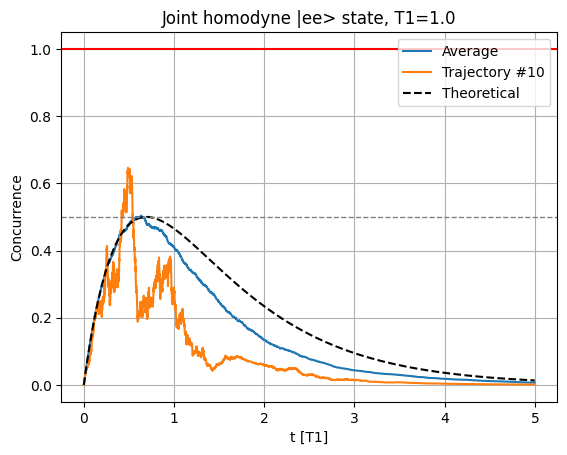

In [ ]:
for i, theta in enumerate(my_theta):
    # plottiamo la curva per il theta i-esimo
    plt.plot(times, mean_conc_ee_solutions_jhom[i], label=f"Average θ={theta:.2f}")

#line2, = plt.plot(times, conc_ee_solutions_jhom[11], label="Trajectory #10")
line3, = plt.plot(times, theo_concurrence(times, GAMMA), color='black', linestyle ='--', label="Theoretical")

plt.axhline(y=0.5, color='gray', linestyle='--', linewidth=1, label='y = 0.5')
plt.axhline(y=1, color='red', linestyle='-', linewidth=1.5, label='y = 1')

plt.xlabel("t [T1]")
plt.ylabel("Concurrence")
plt.title(f"Joint homodyne |ee> state, T1={T_1}")
plt.grid(True)
plt.legend(handles = [line1, line3])
plt.show()

